<a href="https://colab.research.google.com/github/Annie173/AI-Store-Charts/blob/master/AMLlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from tensorflow.keras.applications import VGG16 #3
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# Training a CNN from Scratch Using pretrained CNNs
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load the pretrained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Unfreeze some or all layers to train from scratch
for layer in base_model.layers:
    layer.trainable = True  # Allow these layers to be retrained

# Add custom layers on top of the pretrained base
model = models.Sequential([
    base_model,  # Use the pretrained base
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(10, activation='softmax')  # Final output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the entire model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5079s 6s/step - accuracy: 0.1721 - loss: 2.0968 - val_accuracy: 0.3039 - val_loss: 1.7853
Epoch 2/5
274/782 ━━━━━━━━━━━━━━━━━━━━ 53:02 6s/step - accuracy: 0.2992 - loss: 1.7412

KeyboardInterrupt: 

Model Summary:


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


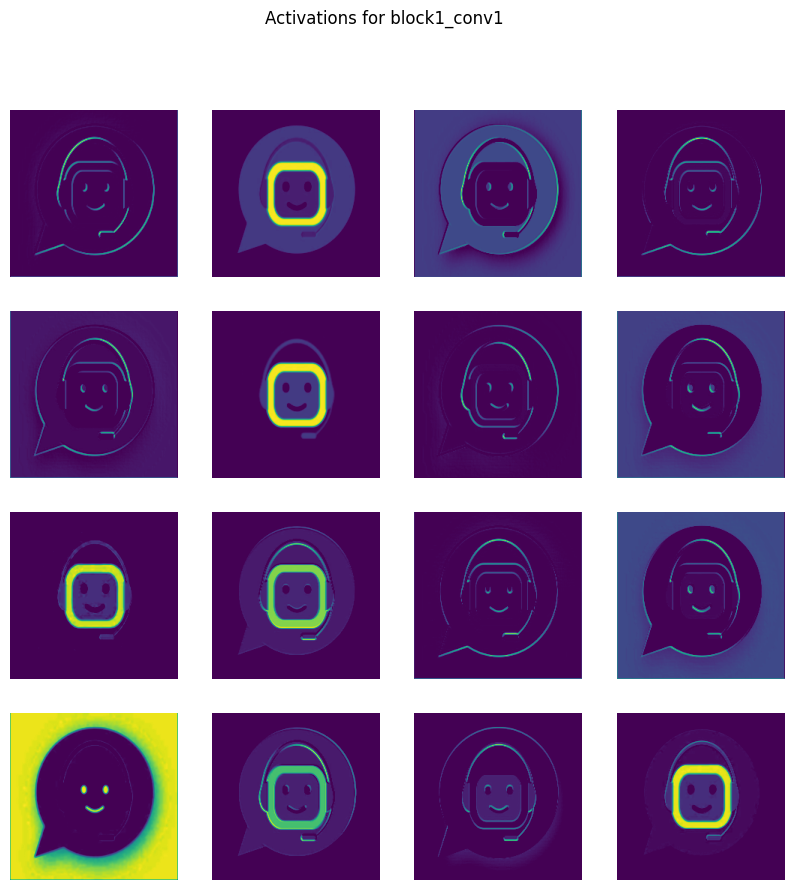

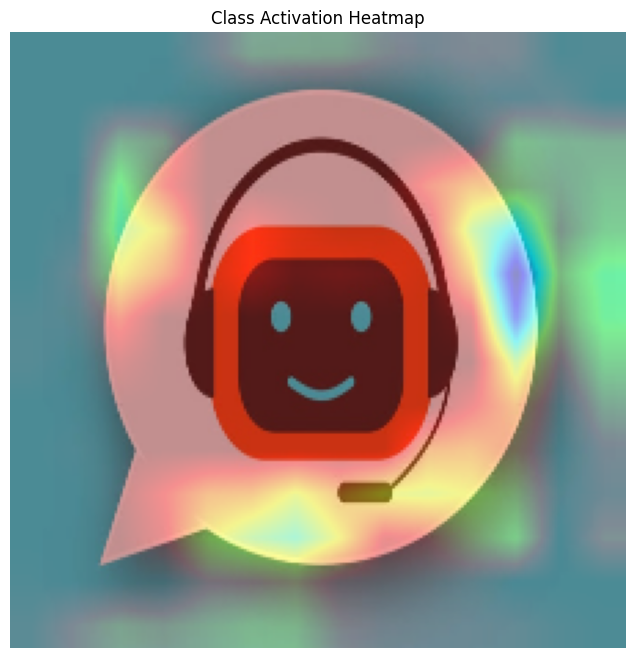

In [5]:
import numpy as np #4
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input  # Correct import
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import cv2
# Visualize what CNNs are learning – Intermediate Activations, Convnet Filters, Heatmaps
# Load pretrained VGG16 model
model = VGG16(weights="imagenet")

# Print model summary
print("Model Summary:")
model.summary()

# Load and preprocess the input image
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # VGG16 requires 224x224 input
    img = preprocess_input(np.expand_dims(img, axis=0))  # Preprocess for VGG16
    return img

# Visualize intermediate activations
def visualize_intermediate(model, img_path, layer_name):
    img = preprocess_image(img_path)
    intermediate_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    activation = intermediate_model.predict(img)[0]

    plt.figure(figsize=(10, 10))
    for i in range(min(activation.shape[-1], 16)):  # Show 16 filters
        plt.subplot(4, 4, i + 1)
        plt.imshow(activation[:, :, i], cmap="viridis")
        plt.axis("off")
    plt.suptitle(f"Activations for {layer_name}")
    plt.show()

# Visualize heatmap
def visualize_heatmap(model, img_path, layer_name):
    img = preprocess_image(img_path)
    grad_model = Model(inputs=model.input, outputs=[model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img)
        class_idx = tf.argmax(predictions[0])  # Predicted class
        grads = tape.gradient(predictions[:, class_idx], conv_output)[0]

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_mean(conv_output * pooled_grads, axis=-1).numpy()
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)  # Normalize

    # Overlay heatmap on original image
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(cv2.resize(original_img, (224, 224)), cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    plt.figure(figsize=(8, 8))
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.title("Class Activation Heatmap")
    plt.show()

# Example usage
img_path = "/content/b3.jpg"  # Replace with the path to your image
visualize_intermediate(model, img_path, "block1_conv1")  # Visualize layer activations
visualize_heatmap(model, img_path, "block5_conv3")       # Generate heatmap


In [6]:
!pip install keras-tuner#5
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
import keras_tuner as kt
import numpy as np
# Exploring Multi-Input, Multi-output Models Hyperparameter Tuning
# Generate sample data
def generate_data(samples=1000):
    input1 = np.random.rand(samples, 10)
    input2 = np.random.rand(samples, 5)
    output1 = np.sum(input1, axis=1) + np.sum(input2, axis=1)
    output2 = np.mean(input1, axis=1) - np.mean(input2, axis=1)
    return [input1, input2], [output1, output2]

train_inputs, train_outputs = generate_data()

# Build model
def build_model(hp):
    input1 = Input(shape=(10,))
    input2 = Input(shape=(5,))
    x1 = layers.Dense(hp.Int('units1', 16, 64, 16), activation='relu')(input1)
    x2 = layers.Dense(hp.Int('units2', 16, 64, 16), activation='relu')(input2)
    merged = layers.concatenate([x1, x2])
    merged = layers.Dense(hp.Int('units_merge', 16, 64, 16), activation='relu')(merged)
    output1 = layers.Dense(1)(merged)
    output2 = layers.Dense(1)(merged)
    model = Model([input1, input2], [output1, output2])
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('lr', [0.001, 0.01])),
                  loss='mse')
    return model

# Hyperparameter tuning
tuner = kt.Hyperband(build_model, objective='val_loss', max_epochs=10, directory='tuning_dir')
val_inputs, val_outputs = generate_data(200)
tuner.search(train_inputs, train_outputs, validation_data=(val_inputs, val_outputs), epochs=10)

# Retrieve and display the best model
best_model = tuner.get_best_models(1)[0]
best_model.summary()  # Display model architecture

# Train the best model
best_model.fit(train_inputs, train_outputs, validation_data=(val_inputs, val_outputs), epochs=20)


Trial 30 Complete [00h 00m 05s]
val_loss: 0.01134234294295311

Best val_loss So Far: 0.0005415749037638307
Total elapsed time: 00h 01m 57s


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 10)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 48)             │            528 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 48)             │            288 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 96)             │              0 │ dense[0][0],           │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 32)             │          3,104 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             33 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1)              │             33 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,986 (15.57 KB)

 Trainable params: 3,986 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - dense_3_loss: 0.6126 - dense_4_loss: 0.1140 - loss: 0.7272 - val_dense_3_loss: 0.0352 - val_dense_4_loss: 0.0010 - val_loss: 0.0353
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - dense_3_loss: 0.0222 - dense_4_loss: 0.0073 - loss: 0.0295 - val_dense_3_loss: 0.0038 - val_dense_4_loss: 0.0015 - val_loss: 0.0053
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - dense_3_loss: 0.0022 - dense_4_loss: 7.1093e-04 - loss: 0.0029 - val_dense_3_loss: 5.2668e-04 - val_dense_4_loss: 3.2754e-04 - val_loss: 9.0522e-04
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - dense_3_loss: 4.6413e-04 - dense_4_loss: 2.3784e-04 - loss: 7.0246e-04 - val_dense_3_loss: 3.1491e-04 - val_dense_4_loss: 1.6015e-04 - val_loss: 5.1517e-04
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - dense_3_loss: 3.9028e-04 - dense_4_loss: 1.4206e-04 - loss: 5.3266e-04 - val_dense_3_loss: 2.4333e-04 - val_dense_4_loss: 1.1528e-04 - val_loss: 3.8535e-04
Epoch 6/20
32/32

In [8]:
import numpy as np#6
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
# Text Generation Using LSTM.
# Input text and preprocessing
text = "Your input text here. Ensure it's long enough."
chars = sorted(list(set(text)))  # Unique characters in the text
char_indices = {char: idx for idx, char in enumerate(chars)}  # Map char to index
indices_char = {idx: char for idx, char in enumerate(chars)}  # Map index to char

# Hyperparameters
maxlen = 40  # Length of sequences
step = 3     # Step size for sampling sequences

# Create sequences and corresponding next characters
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

# Vectorization
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool_)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

# Build LSTM model
model = Sequential([
    LSTM(128, input_shape=(maxlen, len(chars))),
    Dense(len(chars), activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# Train the model
model.fit(X, y, batch_size=128, epochs=20)  # Reduced epochs for simplicity

# Text generation
def generate_text(model, text, length=400, diversity=0.5):
    start_index = np.random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]
    print(f"Seed text: \"{generated_text}\"")

    for _ in range(length):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            x_pred[0, t, char_indices[char]] = 1

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = np.random.choice(len(chars), p=preds)  # Sample based on probabilities
        next_char = indices_char[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]  # Keep the sequence length constant

    print(f"Generated text: \"{generated_text}\"")

# Generate new text
generate_text(model, text)



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.8837
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 2.7670
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 2.6405
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 2.3736
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.3933
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.8689
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.8029
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.7417
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.7124
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.6952
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.6832
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.6738
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.6665
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.6615
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.6605
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.8385 - loss: 0.5703 - val_accuracy: 0.9628 - val_loss: 0.1308
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 44s 108ms/step - accuracy: 0.9677 - loss: 0.1105 - val_accuracy: 0.9752 - val_loss: 0.0893
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.9802 - loss: 0.0680 - val_accuracy: 0.9818 - val_loss: 0.0647
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9878 - loss: 0.0442 - val_accuracy: 0.9833 - val_loss: 0.0603
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9894 - loss: 0.0359 - val_accuracy: 0.9847 - val_loss: 0.0548
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 43s 98ms/step - accuracy: 0.9917 - loss: 0.0280 - val_accuracy: 0.9835 - val_loss: 0.0569
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.9938 - loss: 0.0221 - val_accuracy: 0.9814 - val_loss: 0.0653
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9947 - loss: 0.0180 -

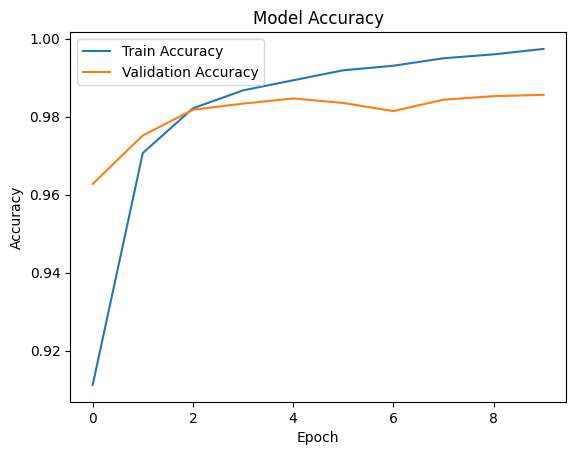

In [10]:
import numpy as np #2A
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
# Experiment Code for MNIST Classification
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)  # Add channel dimension
x_test = x_test.reshape(-1, 28, 28, 1)    # Add channel dimension
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=200, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step - accuracy: 0.6746 - loss: 0.5846 - val_accuracy: 0.8366 - val_loss: 0.3738
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 445s 1s/step - accuracy: 0.8926 - loss: 0.2706 - val_accuracy: 0.8764 - val_loss: 0.3127
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 449s 1s/step - accuracy: 0.9317 - loss: 0.1800 - val_accuracy: 0.8730 - val_loss: 0.3124
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - accuracy: 0.9541 - loss: 0.1356 - val_accuracy: 0.8488 - val_loss: 0.4090
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 433s 1s/step - accuracy: 0.9577 - loss: 0.1176 - val_accuracy: 0.8600 - val_loss: 0.3872
782/782 ━━━━━━━━━━━━━━━━━━━━ 211s 270ms/step - accuracy: 0.8529 - loss: 0.4179
Test accuracy: 0.8535


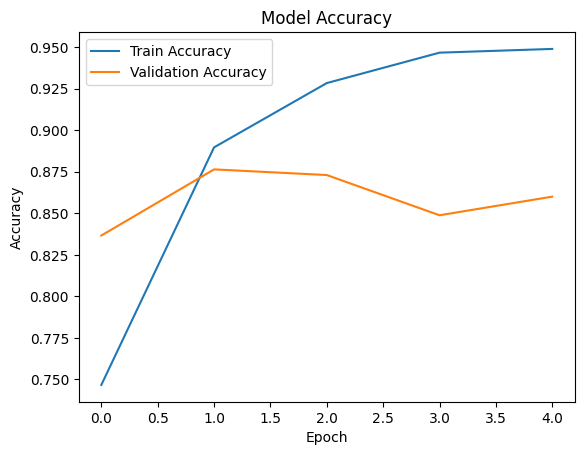

In [12]:
from keras.datasets import imdb #2B
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
# Experiment Code for IMDB Sentiment Analysis
# Load IMDB dataset with the top 10,000 words only
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to ensure uniform input size
max_length = 500
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    LSTM(128),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#Dealing with null values
df = pd.read_csv('/kaggle/input/students-annual-score/Students Annual Score.csv")
print(df.isnull().sum())

df_cleaned df.dropna (subset=['Exam_02'])
print(df_cleaned.isnull().sum())

# Dealing with duplication
duplicate_rows = df [df.duplicated()]
print(duplicate_rows)
print("Number of duplicate rows", df.duplicated().sum())

df_cleaned df_cleaned.drop_duplicates()
print("Number of duplicate rows", df_cleaned.duplicated().sum())

#Dealing with outliers
z_scores = np.abs(stats.zscore(df_cleaned['Exam_03']))
outliers = df_cleaned[z_scores > 3]
print(outliers)

df_cleaned = df_cleaned[z_scores <= 3]
z_scores = np.abs(stats.zscore(df_cleaned['Exam_03']))
outliers = df_cleaned [z_scores > 3]
print(outliers.sum())

#Dropping attribute if needed
columns_to_drop = ['Test_01']
if 'Test_01' in df.columns:
    df.drop(columns=columns_to_drop, inplace=True)
    print(df)

else:
    print("Column 'Test_01' not found.")